# Problem set 4: Analyzing data

In [123]:
#%pip install git+https://github.com/Kristianuruplarsen/pydst.git
#%pip install git+https://github.com/alemartinello/dstapi

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd

# 'old' version
#from PyDST import pydst as dst
#dst = DST(lang='en')

# 'new' PyDST
import PyDST
dst = PyDST.pydst
dstu = PyDST.utils

# DstApi
from dstapi import DstApi

C:\Users\jonas\AppData\Local\Temp\ipykernel_14332\3143063603.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Tasks

## Import national account data from Denmark Statistics

Consider the following dictionary definitions:

In [124]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [125]:
# hint, nah1 = dst.get_data(table_id = '?', variables={'TRANSAKT':[?], 'PRISENHED':[?], 'TID':[?]})
data = dst.get_data(table_id = 'nah1', variables={'TRANSAKT':['*'], 'PRISENHED':['*'], 'TID':['*']})
nah1 = dstu.to_dataframe(data)
nah1.sample(20)


,TRANSAKT,PRISENHED,TID,INDHOLD
1824,P.31 Household consumption expenditure,Current prices,1966,47257
3130,P.61 Export of goods,Current prices,2018,753497
217,P.11 Market output,"2010-prices, chained values",2012,..
2878,P.53 Acquisitions less disposals of valuables,Current prices,1994,1406
539,P.131 Payment for other non-marked output,"2010-prices, chained values",1992,..
2141,P.3 Government consumption expenditure,"2010-prices, chained values",1998,387763
885,D.21-D.31 Taxes less subsidies on products,"2010-prices, chained values",1996,201994
803,D.21-D.31 Taxes less subsidies on products,Current prices,1971,16686
1087,D.31 Subsidies on products,"2010-prices, chained values",1970,5223
2156,P.3 Government consumption expenditure,"2010-prices, chained values",2013,495701


**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [126]:
# hint, nah1_true.rename(?,inplace=True)
nah1.rename(columns = columns_dict, inplace=True)

# for key,value in var_dict.items():
#   nah1.variable.replace(?)
nah1.variable.replace(var_dict, inplace=True)

#for key,value in unit_dict.items():
#   nah1.unit.replace(?)
nah1.unit.replace(unit_dict, inplace=True)
nah1

,variable,unit,year,value
0,Y,nominal,1966,144582
1,Y,nominal,1967,155581
2,Y,nominal,1968,167877
3,Y,nominal,1969,190530
4,Y,nominal,1970,213743
...,...,...,...,...
3415,Uses,real,2018,5028931
3416,Uses,real,2019,5109296
3417,Uses,real,2020,5014298
3418,Uses,real,2021,5327509


**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [127]:
# write you code here
I = nah1.variable.isin(var_dict.values()) # .isin operator is True if nah1.variable is in the values of var_dict
nah1 = nah1[I]
nah1.reset_index(inplace = True, drop = True) # Drop old index too

# value to float
nah1.value = nah1.value.astype('float')
nah1

C:\Users\jonas\AppData\Local\Temp\ipykernel_14332\3112660253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nah1.value = nah1.value.astype('float')


,variable,unit,year,value
0,Y,nominal,1966,144582.0
1,Y,nominal,1967,155581.0
2,Y,nominal,1968,167877.0
3,Y,nominal,1969,190530.0
4,Y,nominal,1970,213743.0
...,...,...,...,...
679,X,real,2018,1214525.0
680,X,real,2019,1269312.0
681,X,real,2020,1189258.0
682,X,real,2021,1284268.0


**Step 4:** Discuss what the following summary statistics show.

In [128]:
nah1.groupby(['variable','unit']).describe()

# The table shows statistics for each variable C, G, I, M, X, Y by price unit.
#  Also for the variable year, but that is meaningless.

year                                                     \
                 count    mean        std     min     25%     50%     75%   
variable unit                                                               
C        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
G        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
I        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
M        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
X        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
Y        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2022.0  57.0  8.047029e+05  5.306998e+05    62576.0   
         real     2022.0  57.0  1.067326e+06  2.842691e+05   549491.0   
G        nominal  2022.0  57.0  2.730288e+05  1.880838e+05    14768.0   
         real     2022.0  57.0  3.737795e+05  1.041112e+05   171307.0   
I        nominal  2022.0  57.0  2.375686e+05  1.682388e+05    21134.0   
         real     2022.0  57.0  2.823976e+05  1.143270e+05   127630.0   
M        nominal  2022.0  57.0  4.681651e+05  4.044817e+05    24406.0   
         real     2022.0  57.0  5.032454e+05  3.358996e+05   112171.0   
X        nominal  2022.0  57.0  5.279656e+05  4.653913e+05    23110.0   
         real     2022.0  57.0  5.846486e+05  3.778421e+05   123594.0   
Y        nominal  2022.0  57.0  1.889868e+06  1.350346e+06   144582.0   
         real     2022.0  57.0  2.367772e+06  8.495330e+05  1089347.0   

                                                              
                        25%        50%        75%        max  
variable unit                                                 
C        nominal   322000.0   748365.0  1305931.0  1813301.0  
         real      847062.0  1040029.0  1343243.0  1556887.0  
G        nominal   105298.0   242403.0   452185.0   615429.0  
         real      310237.0   355506.0   473421.0   537877.0  
I        nominal    80672.0   186087.0   353247.0   687274.0  
         real      183220.0   236281.0   359370.0   566934.0  
M        nominal   132098.0   307210.0   789148.0  1642000.0  
         real      213097.0   363124.0   803852.0  1218214.0  
X        nominal   130293.0   366045.0   895202.0  1939362.0  
         real      245273.0   475081.0   914933.0  1394882.0  
Y        nominal   677930.0  1603057.0  3093079.0  5227195.0  
         real     1615002.0  2210638.0  3198587.0  4015530.0

**Answer:** See A1.py

## Merge with population data from Denmark Statistics

Load population data from Denmark Statistics:

In [129]:
data1 = dst.get_data(table_id = 'FT', variables={'HOVEDDELE':['*'], 'TID':['*']}, lang ='en')
pop = dstu.to_dataframe(data1)
pop.rename(columns={'TID':'year','INDHOLD':'population'},inplace=True)
I = pop.HOVEDDELE == 'All Denmark'
pop =  pop.loc[I,['year','population']]
pop.head()

,year,population
0,1769,797584
1,1787,841806
2,1801,929001
3,1834,1230964
4,1840,1289075


**Question 1:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [130]:
# hint, merged = pd.merge(?,?,how='?',on=[?])
merged = pd.merge(nah1, pop, on=['year'], how='left')
merged.tail(10)

,variable,unit,year,value,population
674,X,real,2013,1008147.0,5602628.0
675,X,real,2014,1039691.0,5627235.0
676,X,real,2015,1076884.0,5659715.0
677,X,real,2016,1121160.0,5707251.0
678,X,real,2017,1175129.0,5748769.0
679,X,real,2018,1214525.0,5781190.0
680,X,real,2019,1269312.0,5806081.0
681,X,real,2020,1189258.0,5822763.0
682,X,real,2021,1284268.0,5840045.0
683,X,real,2022,1394882.0,5873420.0


**Answer:** See A2.py

**Question 2:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [131]:
pop_with_index = pop.set_index(['year'])
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
merged_with_index = merged.set_index(['year'])
merged_alt = merged_with_index.join(pop_with_index)
merged_alt.tail(10)

,variable,unit,value,population,population_alt
year,,,,,
2022,M,nominal,1642000.0,5873420.0,5873420.0
2022,M,real,1218214.0,5873420.0,5873420.0
2022,C,nominal,1813301.0,5873420.0,5873420.0
2022,C,real,1515034.0,5873420.0,5873420.0
2022,G,nominal,615429.0,5873420.0,5873420.0
2022,G,real,519317.0,5873420.0,5873420.0
2022,I,nominal,687274.0,5873420.0,5873420.0
2022,I,real,566934.0,5873420.0,5873420.0
2022,X,nominal,1939362.0,5873420.0,5873420.0


**Answer:** See A3.py

## Split-apply-combine-(plot)

Consider the following **split-apply-combine-plot:**

In [132]:
nah1_true = nah1.copy() # copy of original dataframe to run the pre-written code

# a. split
nah1_true_grouped = nah1_true.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# b. apply
nah1_true.set_index(['variable','unit','year'],inplace=True)
nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1_true.reset_index(inplace=True)

# c. combine
nah1_true['indexed'] = nah1_true['value']/nah1_true['first']

# d. plot
def plot(df):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])['indexed'].plot(legend=True);
    
nah1_true

,variable,unit,year,value,first,indexed
0,Y,nominal,1966,144582.0,144582.0,1.000000
1,Y,nominal,1967,155581.0,144582.0,1.076074
2,Y,nominal,1968,167877.0,144582.0,1.161120
3,Y,nominal,1969,190530.0,144582.0,1.317799
4,Y,nominal,1970,213743.0,144582.0,1.478351
...,...,...,...,...,...,...
679,X,real,2018,1214525.0,123594.0,9.826731
680,X,real,2019,1269312.0,123594.0,10.270013
681,X,real,2020,1189258.0,123594.0,9.622296
682,X,real,2021,1284268.0,123594.0,10.391022


**Question** Implement the same split-apply-combine as above using `transform`.

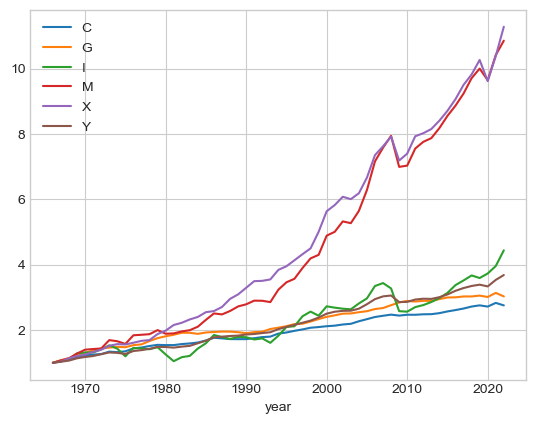

In [133]:
def first(x): # select the first element in a series
    return x.iloc[0]

nah1_alt = nah1.copy()
grouped = nah1_alt.groupby(['variable','unit'])
nah1_alt['indexed'] = grouped.transform(lambda x: x/first(x))['value']

I = nah1_alt.unit == 'real'
nah1_alt = nah1_alt[I]

(nah1_alt.set_index('year')
         .groupby('variable')['indexed']
         .plot(legend=True));


**Answer:** See A4.py

# Problem: The Housing market


## Housing data

**Note:** The file `data/bm010_parcel.xlsx` has been downloaded from http://rkr.statistikbank.dk/201.

**Question:** Go through the cell below and ensure you understand ALL commands.

In [141]:
# a. load data
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2021+1): 
    for k in range(1,4+1): 
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict)        

# d. drop missing
prices = prices.dropna()

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)

# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')

# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.to_datetime(prices_long.d)

# h. cleanup 
del prices_long['year_quarter']
del prices_long['d']

prices_long.head()

,municipality,price,date
0,Hele landet,4021.0,1992-01-01
1,Region Hovedstaden,5836.0,1992-01-01
2,Landsdel København by,5658.0,1992-01-01
3,København,5355.0,1992-01-01
4,Frederiksberg,5183.0,1992-01-01


## Population data

**Question:** Go through the cell below and ensure you understand ALL commands.

In [150]:
# a. load data
# 'new' PyDST
pop_response = dst.get_data(table_id='FOLK1A', variables={'Alder':['IALT'], 'CIVILSTAND':['TOT'], 'Køn':['TOT'], 'Tid':['*'], 'OMRÅDE':['*']})
pop = dstu.to_dataframe(pop_response)

###
# or the 'old' pydst
# pop = dst.get_data(table_id='FOLK1A', variables={'Alder':['IALT'], 'CIVILSTAND':['TOT'], 'Køn':['TOT'], 'Tid':['*'], 'OMRÅDE':['*']})

# or dstapi
# pop_class = DstApi('FOLK1A')
# params = pop_class._define_base_params(language='en')
# params['variables'] = [{'code': 'OMRÅDE', 'values': ['*']},
#                    {'code': 'KØN', 'values': ['TOT']},
#                    {'code': 'ALDER', 'values': ['IALT']},
#                    {'code': 'CIVILSTAND', 'values': ['TOT']},
#                    {'code': 'Tid', 'values': ['*']}]
# pop = pop_class.get_data(params)
###

# b. drop and rename columns
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]

pop = pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'})
pop

# c. drop non-municipalities
for val in ['Region', 'All']: 
    I = pop['municipality'].str.contains(val)
    pop.drop(pop[I].index, inplace=True)

# d. convert to date
pop['date'] = pd.to_datetime(pop.TID)

del pop['TID']

pop.head()

,municipality,population,date
2,Copenhagen,509861,2008-01-01
3,Frederiksberg,93444,2008-01-01
4,Dragør,13261,2008-01-01
5,Tårnby,40016,2008-01-01
6,Albertslund,27602,2008-01-01


## Analysis

**Problem:** Analyze the co-variation betwen population growth and house price growth. Reproduce the graphs below. 

**Hint:** For the second one consider the `agg` method (similar to but different from `transform`, Google it).

Text(0, 0.5, 'log difference in price')

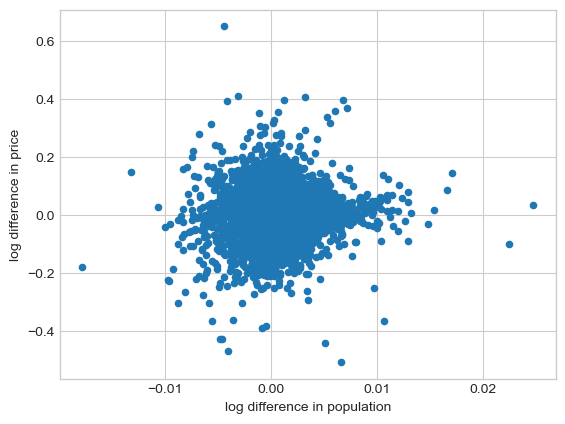

In [192]:
# write your code here 
full = pd.merge(pop, prices_long, on=['date','municipality'], how='left')
full.sort_values(['municipality','date'], inplace=True)

# b. take logs
full['log_population'] =  np.log(full['population'])
full['log_price'] =  np.log(full['price'])

# c. figur 1: log differences
ax = full.groupby('municipality').diff(1).plot(x = 'log_population', y = 'log_price', kind = 'scatter'); 
ax.set_xlabel('log difference in population') 
ax.set_ylabel('log difference in price')



**Answer:** See A5.py for difference within total population. See A6.py for difference within municipality

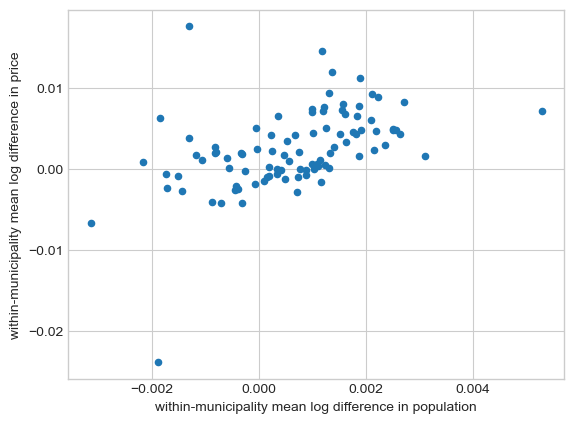

In [193]:
# c. figur 2: mean log differences
ax = full.groupby('municipality').agg(lambda x: np.mean(x.diff())).plot(x = 'log_population', y = 'log_price', kind = 'scatter'); 
ax.set_xlabel('within-municipality mean log difference in population')
ax.set_ylabel('within-municipality mean log difference in price'); 